# Лабораторная работа 5
## Задание 3
## Классификация последовательностей MNIST

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

### 1. Понимание бизнес-задачи

В этом задании сделана работа с последовательностями изображений рукописных цифр и применять различные
архитектуры рекуррентных нейронных сетей (SimpleRNN, LSTM и Bidirectional LSTM) для их классификации. Сделано сравнение эффективности этих архитектур и понятие их преимуществ и недостатков в контексте классификации изображений, представленных как последовательности.



### 2. Понимание данных

Для этого задания использован датасет MNIST, который содержит 70,000 изображений рукописных цифр
(от 0 до 9) размером 28x28 пикселей. Датасет доступен через API Keras.

### 3. Подготовка данных

In [1]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape

In [2]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Вывод информации о данных
print(f'Форма обучающих данных: {x_train.shape}')
print(f'Форма тестовых данных: {x_test.shape}')

Форма обучающих данных: (60000, 28, 28)
Форма тестовых данных: (10000, 28, 28)


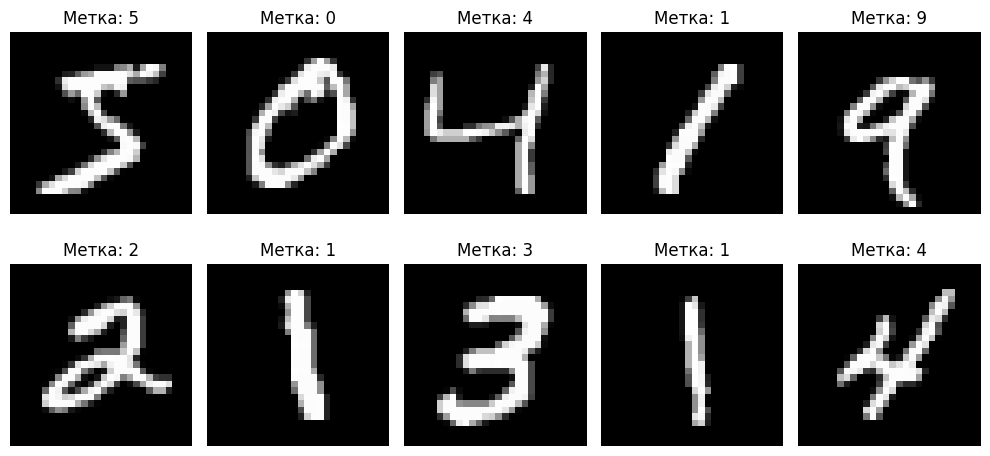

In [3]:
# Визуализация примеров изображений
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Метка: {y_train[i]}')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование меток в категориальный формат (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# Функция для оценки модели
def evaluate_model(model, x_test, y_test, y_test_cat):
  # Предсказание классов
  y_pred_prob = model.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Расчет точности
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Точность (Accuracy): {accuracy:.4f}')

  # Вывод отчета о классификации
  print('\nОтчет о классификации:')
  print(classification_report(y_test, y_pred))

  # Построение матрицы ошибок
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
  plt.title('Матрица ошибок')
  plt.xlabel('Предсказанные метки')
  plt.ylabel('Истинные метки')
  plt.show()
  return accuracy

### 4. Моделирование

In [6]:
# Создание модели SimpleRNN
def create_simple_rnn_model():
  model = Sequential()
  # Входные данные: (batch_size, timesteps, input_dim) = (batch_size, 28, 28)
  # Каждая строка изображения рассматривается как временной шаг
  model.add(SimpleRNN(units=128, input_shape=(28, 28),
                      activation='relu', return_sequences=True))
  model.add(SimpleRNN(units=64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])
  return model

# Обучение модели SimpleRNN
print('Обучение модели SimpleRNN...')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
simple_rnn_model = create_simple_rnn_model()
simple_rnn_history = simple_rnn_model.fit(x_train, y_train_cat,
                                          batch_size=128,
                                          epochs=10,
                                          validation_data=(x_test, y_test_cat),
                                          callbacks=[early_stop],
                                          verbose=2)

Обучение модели SimpleRNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 - 24s - 52ms/step - accuracy: 0.8049 - loss: 0.5875 - val_accuracy: 0.9389 - val_loss: 0.1979
Epoch 2/10
469/469 - 39s - 83ms/step - accuracy: 0.9528 - loss: 0.1615 - val_accuracy: 0.9646 - val_loss: 0.1182
Epoch 3/10
469/469 - 26s - 56ms/step - accuracy: 0.9643 - loss: 0.1203 - val_accuracy: 0.9642 - val_loss: 0.1098
Epoch 4/10
469/469 - 40s - 86ms/step - accuracy: 0.9688 - loss: 0.1041 - val_accuracy: 0.9743 - val_loss: 0.0871
Epoch 5/10
469/469 - 40s - 85ms/step - accuracy: 0.9730 - loss: 0.0901 - val_accuracy: 0.9743 - val_loss: 0.0793
Epoch 6/10
469/469 - 40s - 86ms/step - accuracy: 0.9760 - loss: 0.0811 - val_accuracy: 0.9719 - val_loss: 0.0918
Epoch 7/10
469/469 - 39s - 84ms/step - accuracy: 0.9770 - loss: 0.0775 - val_accuracy: 0.9755 - val_loss: 0.0828
Epoch 8/10
469/469 - 20s - 43ms/step - accuracy: 0.9799 - loss: 0.0692 - val_accuracy: 0.9792 - val_loss: 0.0748
Epoch 9/10
469/469 - 22s - 46ms/step - accuracy: 0.9797 - loss: 0.0685 - val_accuracy: 0.9746 - 

In [7]:
# Создание модели LSTM
def create_lstm_model():
  model = Sequential()
  model.add(LSTM(128, input_shape=(28, 28), activation='relu', return_sequences=True))
  model.add(Dropout(0.3))
  model.add(LSTM(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Обучение модели LSTM
print('Обучение модели LSTM...')
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train_cat,
                              batch_size=128,
                              epochs=10,
                              validation_data=(x_test, y_test_cat),
                              callbacks=[early_stop],
                              verbose=2)

Обучение модели LSTM...
Epoch 1/10
469/469 - 66s - 140ms/step - accuracy: 0.7658 - loss: 0.7057 - val_accuracy: 0.9424 - val_loss: 0.1881
Epoch 2/10
469/469 - 83s - 178ms/step - accuracy: 0.9414 - loss: 0.1984 - val_accuracy: 0.9662 - val_loss: 0.1075
Epoch 3/10
469/469 - 63s - 134ms/step - accuracy: 0.9623 - loss: 0.1318 - val_accuracy: 0.9721 - val_loss: 0.0833
Epoch 4/10
469/469 - 69s - 146ms/step - accuracy: 0.9713 - loss: 0.0994 - val_accuracy: 0.9691 - val_loss: 0.1002
Epoch 5/10
469/469 - 76s - 161ms/step - accuracy: 0.9746 - loss: 0.0880 - val_accuracy: 0.9795 - val_loss: 0.0653
Epoch 6/10
469/469 - 82s - 175ms/step - accuracy: 0.9788 - loss: 0.0747 - val_accuracy: 0.9829 - val_loss: 0.0595
Epoch 7/10
469/469 - 82s - 174ms/step - accuracy: 0.9814 - loss: 0.0642 - val_accuracy: 0.9838 - val_loss: 0.0505
Epoch 8/10
469/469 - 83s - 177ms/step - accuracy: 0.9847 - loss: 0.0555 - val_accuracy: 0.9836 - val_loss: 0.0632
Epoch 9/10
469/469 - 81s - 173ms/step - accuracy: 0.9860 - loss:

In [8]:
# Создание модели Bidirectional LSTM
def create_bidirectional_lstm_model():
  model = Sequential()
  model.add(Bidirectional(LSTM(units=128, activation='relu',
                              return_sequences=True), input_shape=(28, 28)))
  model.add(Bidirectional(LSTM(units=64, activation='relu')))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])
  return model

# Обучение модели Bidirectional LSTM
print('Обучение модели Bidirectional LSTM...')
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_history = bidirectional_lstm_model.fit(x_train, y_train_cat,
                                                          batch_size=128,
                                                          epochs=10,
                                                          validation_data=(x_test, y_test_cat),
                                                          callbacks=[early_stop],
                                                          verbose=2)

Обучение модели Bidirectional LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 - 140s - 298ms/step - accuracy: 0.8055 - loss: 0.6173 - val_accuracy: 0.9433 - val_loss: 0.1818
Epoch 2/10
469/469 - 145s - 310ms/step - accuracy: 0.9558 - loss: 0.1434 - val_accuracy: 0.9719 - val_loss: 0.0844
Epoch 3/10
469/469 - 135s - 288ms/step - accuracy: 0.9705 - loss: 0.0941 - val_accuracy: 0.9713 - val_loss: 0.0892
Epoch 4/10
469/469 - 142s - 303ms/step - accuracy: 0.9770 - loss: 0.0726 - val_accuracy: 0.9801 - val_loss: 0.0651
Epoch 5/10
469/469 - 143s - 304ms/step - accuracy: 0.9804 - loss: 0.0623 - val_accuracy: 0.9817 - val_loss: 0.0628
Epoch 6/10
469/469 - 142s - 303ms/step - accuracy: 0.9841 - loss: 0.0507 - val_accuracy: 0.9796 - val_loss: 0.0608
Epoch 7/10
469/469 - 142s - 303ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9799 - val_loss: 0.0718
Epoch 8/10
469/469 - 142s - 302ms/step - accuracy: 0.9863 - loss: 0.0431 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 9/10
469/469 - 138s - 293ms/step - accuracy: 0.9876 - loss: 0.0385 - val_a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 - 46s - 99ms/step - accuracy: 0.9330 - loss: 0.2249 - val_accuracy: 0.9789 - val_loss: 0.0675
Epoch 2/10
469/469 - 45s - 95ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 3/10
469/469 - 81s - 173ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.9878 - val_loss: 0.0360
Epoch 4/10
469/469 - 81s - 174ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9843 - val_loss: 0.0507
Epoch 5/10
469/469 - 43s - 92ms/step - accuracy: 0.9905 - loss: 0.0296 - val_accuracy: 0.9879 - val_loss: 0.0369
Epoch 6/10
469/469 - 83s - 176ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9884 - val_loss: 0.0363

Оценка модели CNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Точность (Accuracy): 0.9878

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99

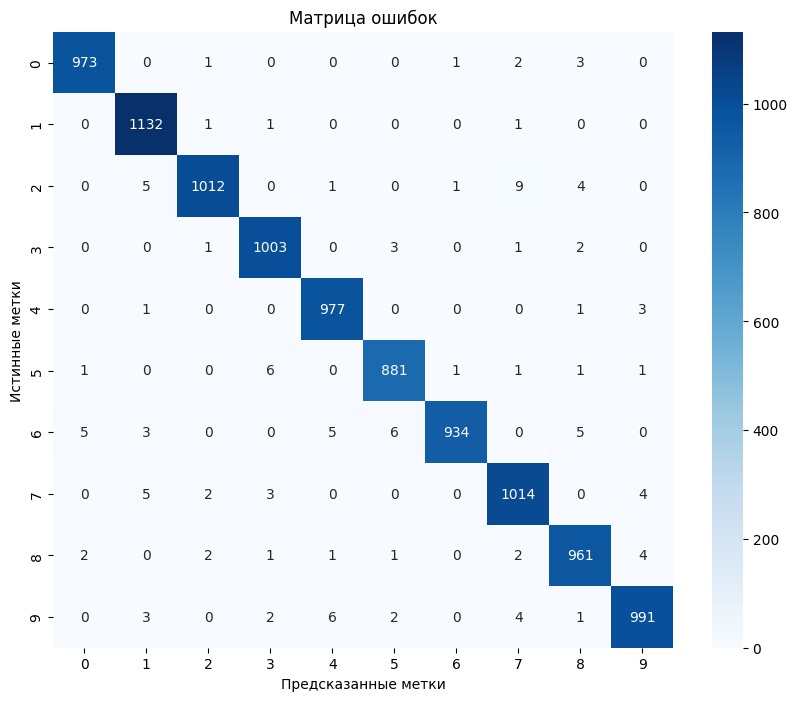

In [9]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# CNN модель
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Обучение
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(x_train_cnn, y_train_cat,
                            batch_size=128, epochs=10,
                            validation_data=(x_test_cnn, y_test_cat),
                            callbacks=[early_stop], verbose=2)

# Оценка
print('\nОценка модели CNN:')
cnn_accuracy = evaluate_model(cnn_model, x_test, y_test, y_test_cat)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 - 34s - 73ms/step - accuracy: 0.8629 - loss: 0.4432 - val_accuracy: 0.9512 - val_loss: 0.1621
Epoch 2/10
469/469 - 40s - 86ms/step - accuracy: 0.9579 - loss: 0.1419 - val_accuracy: 0.9604 - val_loss: 0.1396
Epoch 3/10
469/469 - 41s - 88ms/step - accuracy: 0.9691 - loss: 0.1039 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 4/10
469/469 - 29s - 62ms/step - accuracy: 0.9749 - loss: 0.0841 - val_accuracy: 0.9746 - val_loss: 0.0844
Epoch 5/10
469/469 - 30s - 64ms/step - accuracy: 0.9790 - loss: 0.0680 - val_accuracy: 0.9803 - val_loss: 0.0665
Epoch 6/10
469/469 - 41s - 87ms/step - accuracy: 0.9821 - loss: 0.0597 - val_accuracy: 0.9804 - val_loss: 0.0671
Epoch 7/10
469/469 - 42s - 90ms/step - accuracy: 0.9846 - loss: 0.0518 - val_accuracy: 0.9803 - val_loss: 0.0675
Epoch 8/10
469/469 - 40s - 85ms/step - accuracy: 0.9857 - loss: 0.0468 - val_accuracy: 0.9781 - val_loss: 0.0677

Оценка модели CNN+RNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Точность (Accuracy): 0.9803

От

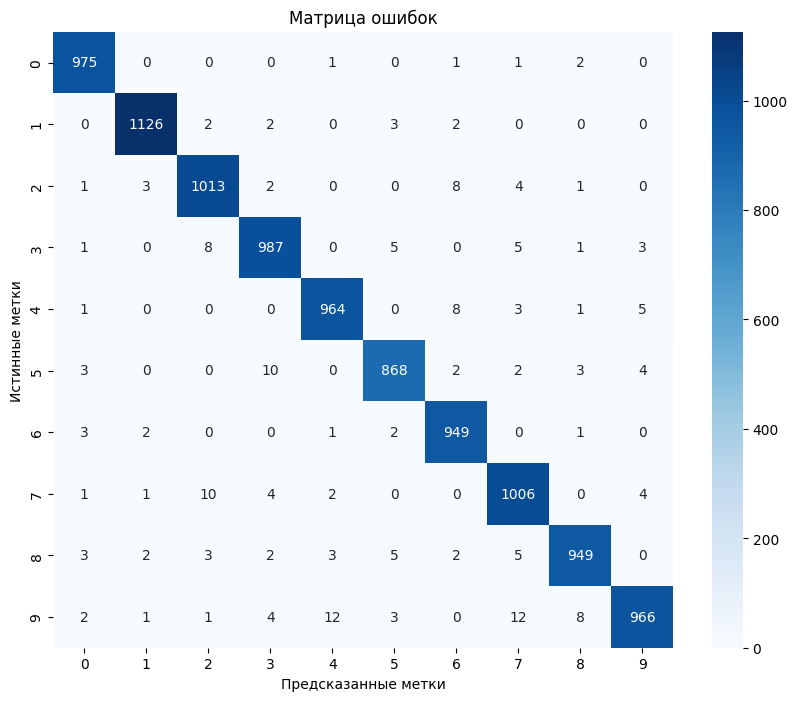

In [10]:
# Комбинированная CNN+RNN модель
def create_cnn_rnn_model():
    model = Sequential()
    model.add(Reshape((28, 28), input_shape=(28, 28, 1)))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Обучение
cnn_rnn_model = create_cnn_rnn_model()
cnn_rnn_history = cnn_rnn_model.fit(x_train_cnn, y_train_cat,
                                    batch_size=128, epochs=10,
                                    validation_data=(x_test_cnn, y_test_cat),
                                    callbacks=[early_stop], verbose=2)

# Оценка
print('\nОценка модели CNN+RNN:')
cnn_rnn_accuracy = evaluate_model(cnn_rnn_model, x_test, y_test, y_test_cat)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 - 68s - 145ms/step - accuracy: 0.7821 - loss: 0.7002 - val_accuracy: 0.9217 - val_loss: 0.2520
Epoch 2/10
469/469 - 61s - 130ms/step - accuracy: 0.9368 - loss: 0.2285 - val_accuracy: 0.9613 - val_loss: 0.1233
Epoch 3/10
469/469 - 85s - 181ms/step - accuracy: 0.9581 - loss: 0.1450 - val_accuracy: 0.9739 - val_loss: 0.0802
Epoch 4/10
469/469 - 64s - 137ms/step - accuracy: 0.9670 - loss: 0.1178 - val_accuracy: 0.9731 - val_loss: 0.0872
Epoch 5/10
469/469 - 81s - 172ms/step - accuracy: 0.9713 - loss: 0.1005 - val_accuracy: 0.9763 - val_loss: 0.0792
Epoch 6/10
469/469 - 83s - 178ms/step - accuracy: 0.9756 - loss: 0.0860 - val_accuracy: 0.9765 - val_loss: 0.0790
Epoch 7/10
469/469 - 79s - 168ms/step - accuracy: 0.9776 - loss: 0.0788 - val_accuracy: 0.9787 - val_loss: 0.0715
Epoch 8/10
469/469 - 83s - 177ms/step - accuracy: 0.9803 - loss: 0.0675 - val_accuracy: 0.9804 - val_loss: 0.0702
Epoch 9/10
469/469 - 63s - 133ms/step - accuracy: 0.9826 - loss: 0.0623 - val_accuracy: 

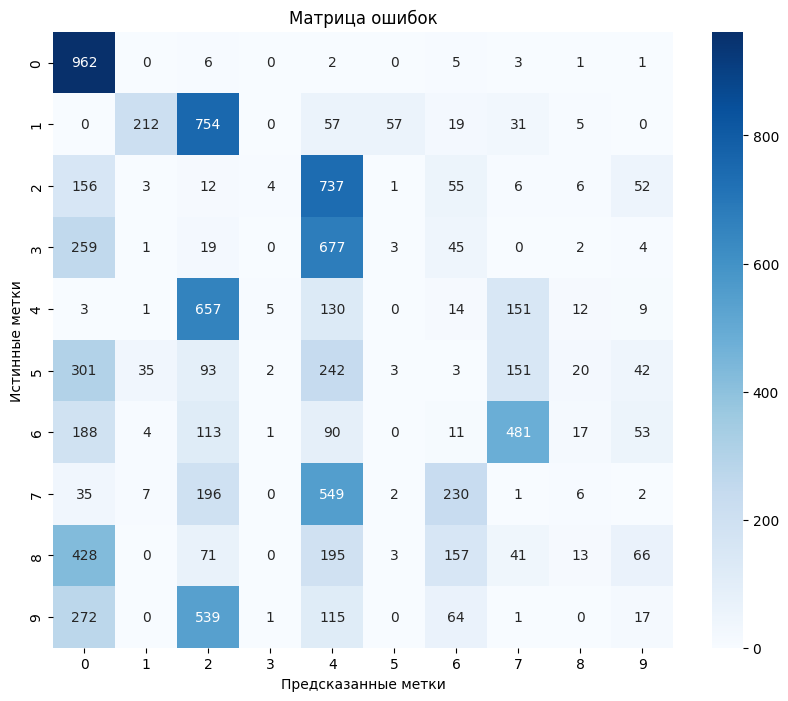

In [11]:
x_train_col = np.transpose(x_train, (0, 2, 1))
x_test_col = np.transpose(x_test, (0, 2, 1))

lstm_col_model = create_lstm_model()
lstm_col_history = lstm_col_model.fit(x_train_col, y_train_cat,
                                      batch_size=128, epochs=10,
                                      validation_data=(x_test_col, y_test_cat),
                                      callbacks=[early_stop], verbose=2)

# Оценка
print('\nОценка модели CNN с представлением изображений по строкам:')
lstm_col_accuracy = evaluate_model(lstm_col_model, x_test, y_test, y_test_cat)

### 5. Оценка моделей


Оценка модели SimpleRNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Точность (Accuracy): 0.9789

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



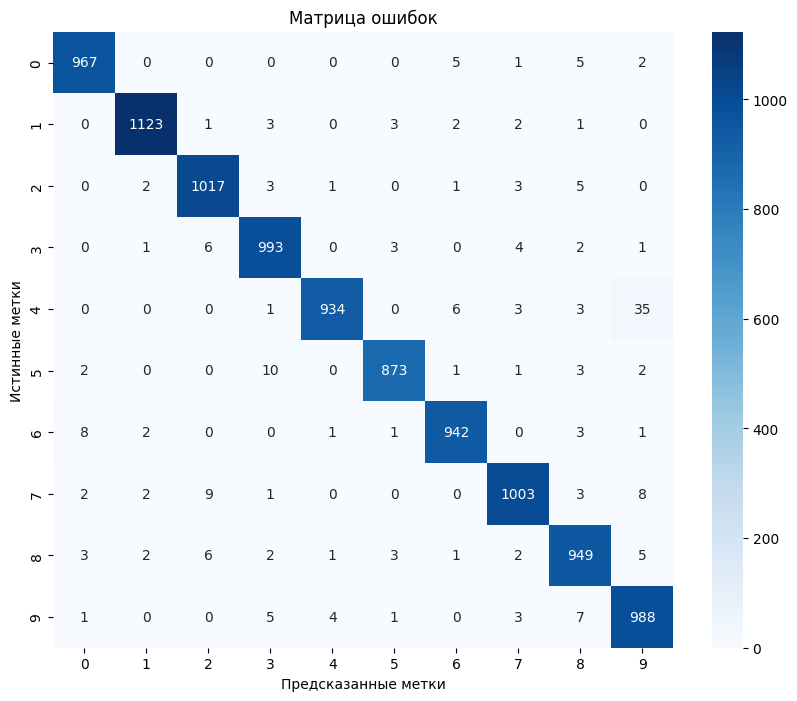


Оценка модели LSTM:
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
Точность (Accuracy): 0.9861

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



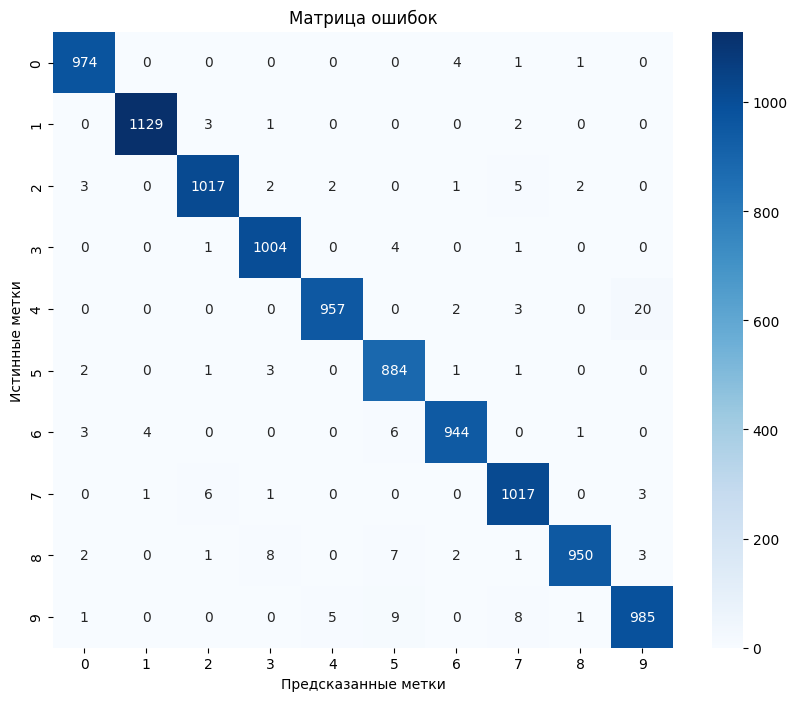


Оценка модели Bidirectional LSTM:
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Точность (Accuracy): 0.9871

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



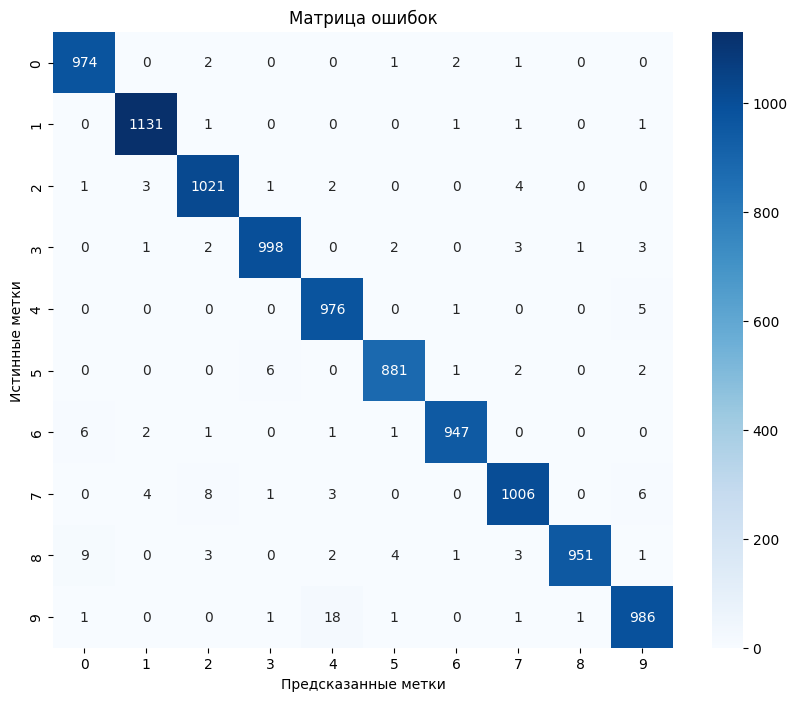

In [12]:
# Оценка модели SimpleRNN
print('\nОценка модели SimpleRNN:')
simple_rnn_accuracy = evaluate_model(simple_rnn_model, x_test, y_test, y_test_cat)

# Оценка модели LSTM
print('\nОценка модели LSTM:')
lstm_accuracy = evaluate_model(lstm_model, x_test, y_test, y_test_cat)

# Оценка модели Bidirectional LSTM
print('\nОценка модели Bidirectional LSTM:')
bidirectional_lstm_accuracy = evaluate_model(bidirectional_lstm_model, x_test, y_test, y_test_cat)

In [14]:
# Визуализация точности на обучающей и проверочной выборках
def plot_history(histories, names):
  plt.figure(figsize=(12, 5))

  # График точности
  plt.subplot(1, 2, 1)
  for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'{names[i]} (обучение)')
    plt.plot(history.history['val_accuracy'], label=f'{names[i]} (проверка)')
  plt.title('Точность моделей')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.legend()

  # График функции потерь
  plt.subplot(1, 2, 2)
  for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'{names[i]} (обучение)')
    plt.plot(history.history['val_loss'], label=f'{names[i]} (проверка)')
  plt.title('Функция потерь')
  plt.xlabel('Эпоха')
  plt.ylabel('Потери')
  plt.legend()
  plt.tight_layout()
  plt.show()

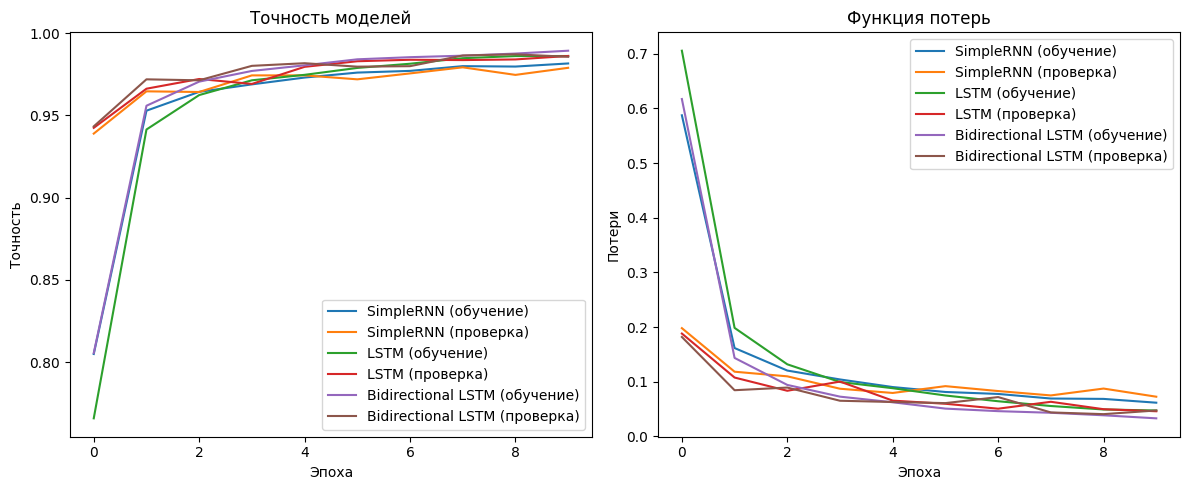

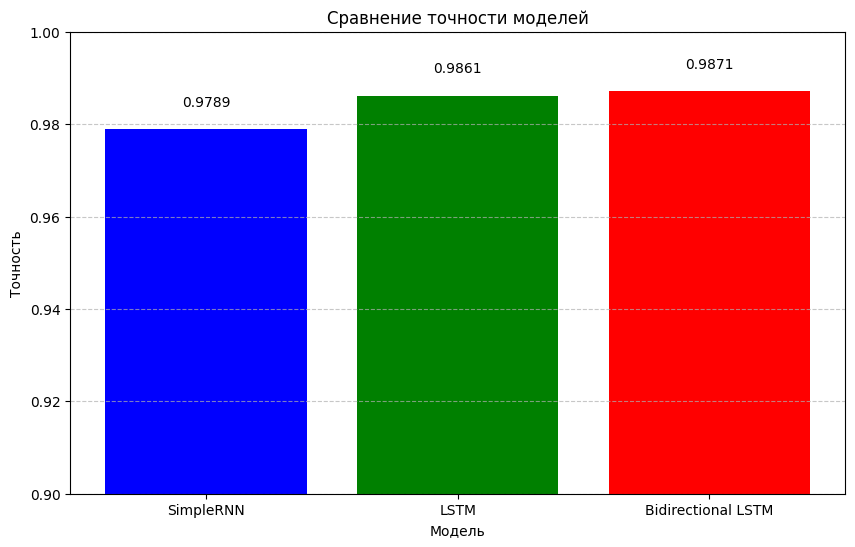

In [16]:
# Визуализация результатов обучения
histories = [simple_rnn_history, lstm_history, bidirectional_lstm_history]
names = ['SimpleRNN', 'LSTM', 'Bidirectional LSTM']
plot_history(histories, names)

# Сравнение точности моделей
accuracies = [simple_rnn_accuracy, lstm_accuracy, bidirectional_lstm_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color=['blue', 'green', 'red'])
plt.title('Сравнение точности моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0.9, 1.0) # Настройте в зависимости от результатов
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
  plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center')
plt.show()

In [17]:
# Анализ неправильно классифицированных примеров
def analyze_misclassifications(model, x_test, y_test, num_examples=5):
  # Получение предсказаний
  y_pred_prob = model.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  # Нахождение неправильно классифицированных примеров
  misclassified_indices = np.where(y_pred != y_test)[0]
  # Вывод неправильно классифицированных примеров
  print(f"Примеры неправильно классифицированных изображений ({model.name}):")
  plt.figure(figsize=(15, 3 * num_examples))
  for i in range(min(num_examples, len(misclassified_indices))):
    idx = misclassified_indices[i]
    plt.subplot(num_examples, 2, 2*i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Истинная метка: {y_test[idx]}, Предсказание: {y_pred[idx]}")
    plt.axis('off')
    # Визуализация вероятностей для каждого класса
    plt.subplot(num_examples, 2, 2*i+2)
    plt.bar(range(10), y_pred_prob[idx])
    plt.xticks(range(10))
    plt.title('Вероятности классов')
    plt.xlabel('Класс')
    plt.ylabel('Вероятность')
  plt.tight_layout()
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Примеры неправильно классифицированных изображений (SimpleRNN):


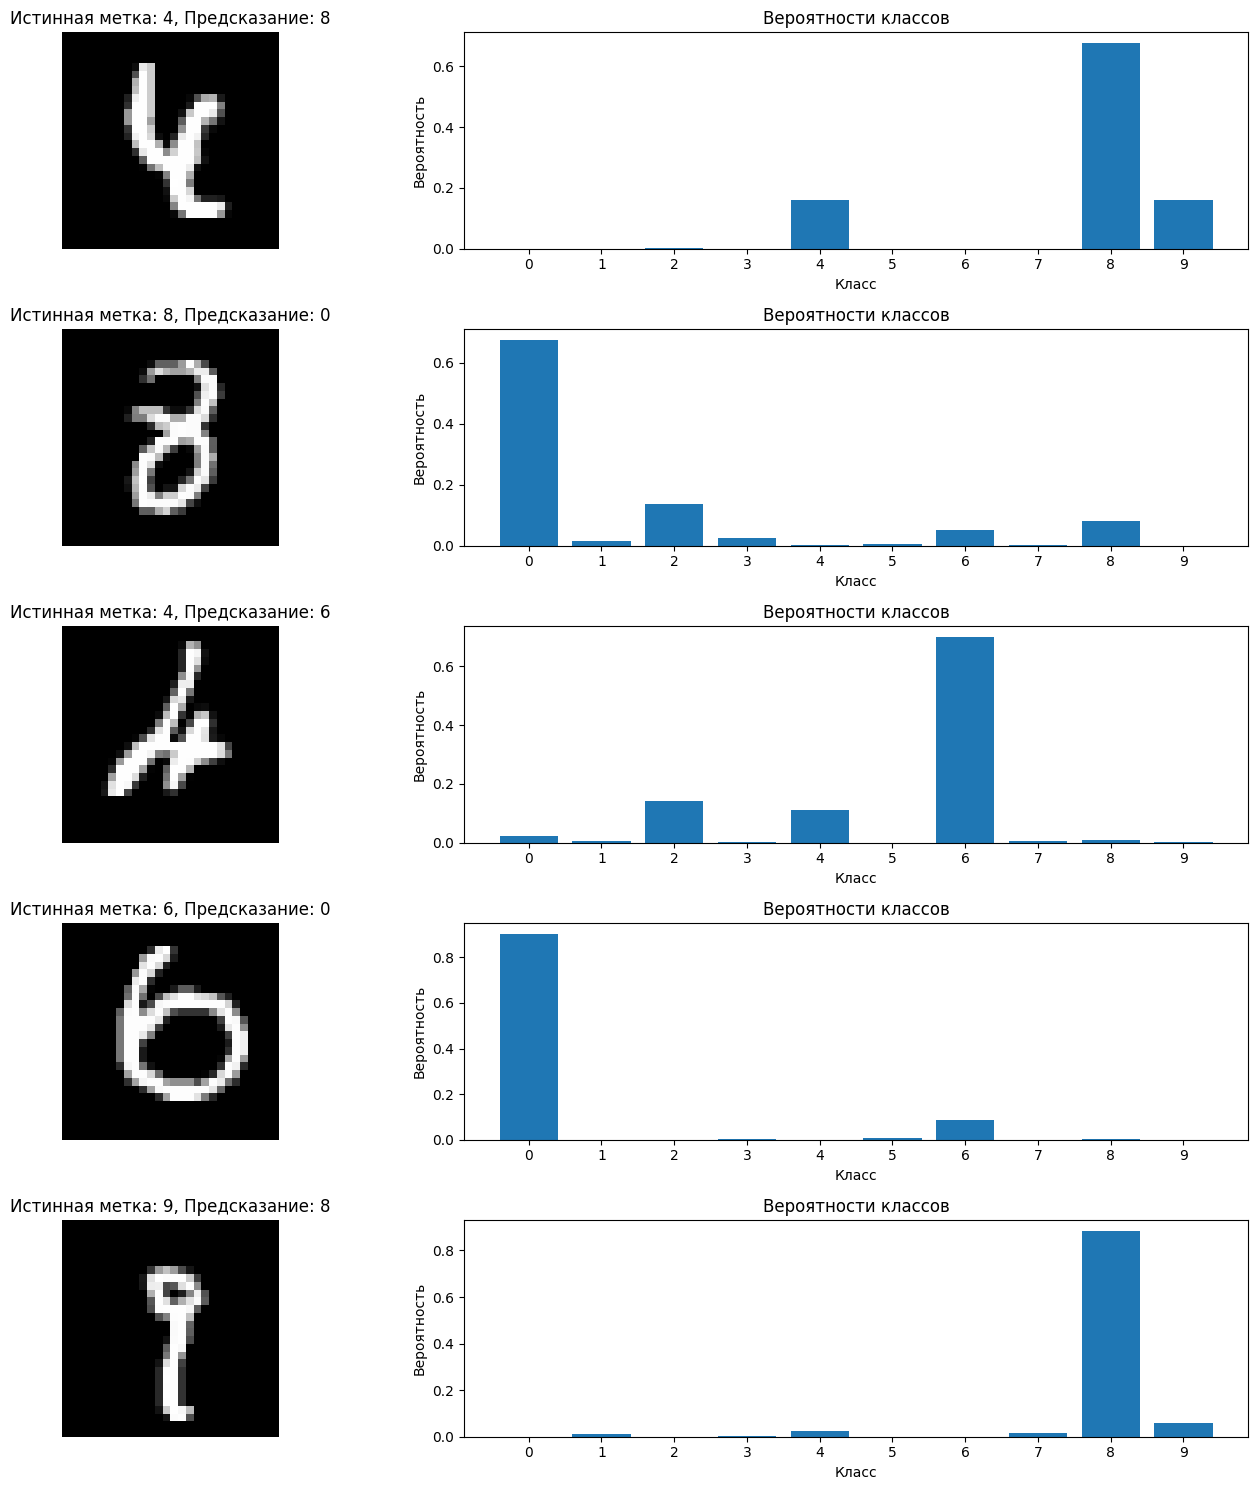

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Примеры неправильно классифицированных изображений (LSTM):


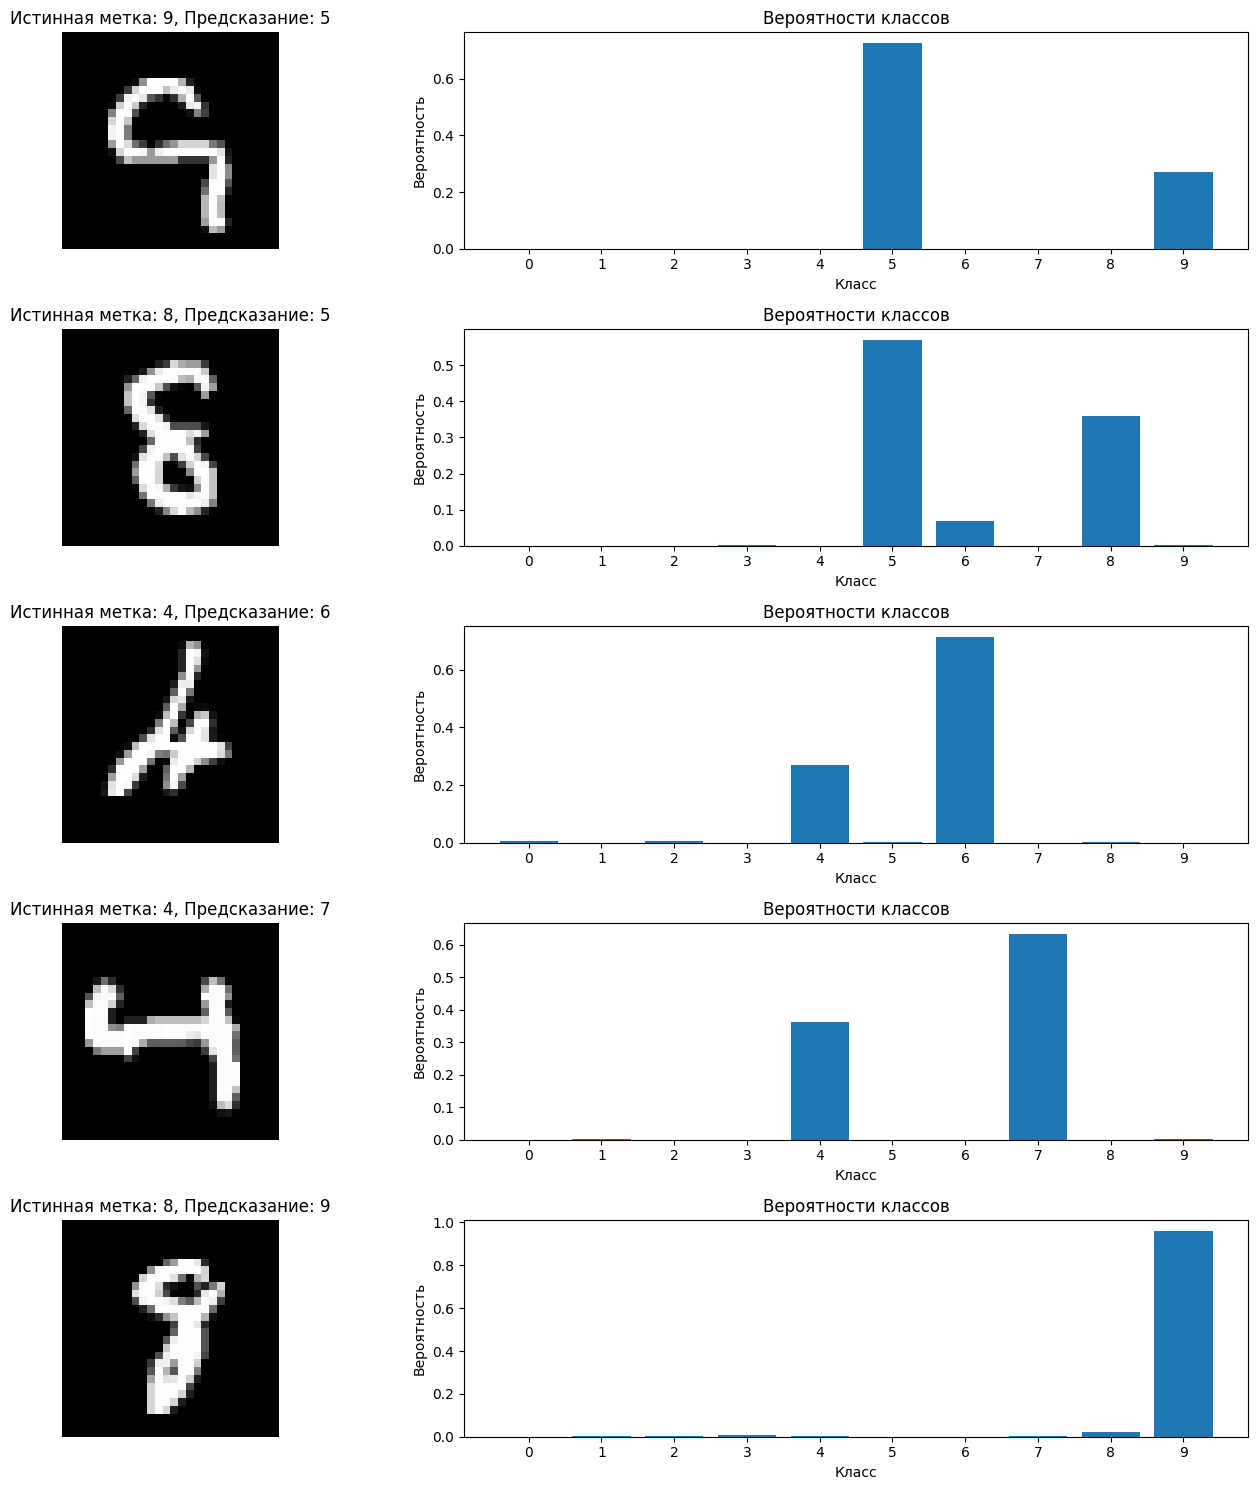

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step
Примеры неправильно классифицированных изображений (Bidirectional LSTM):


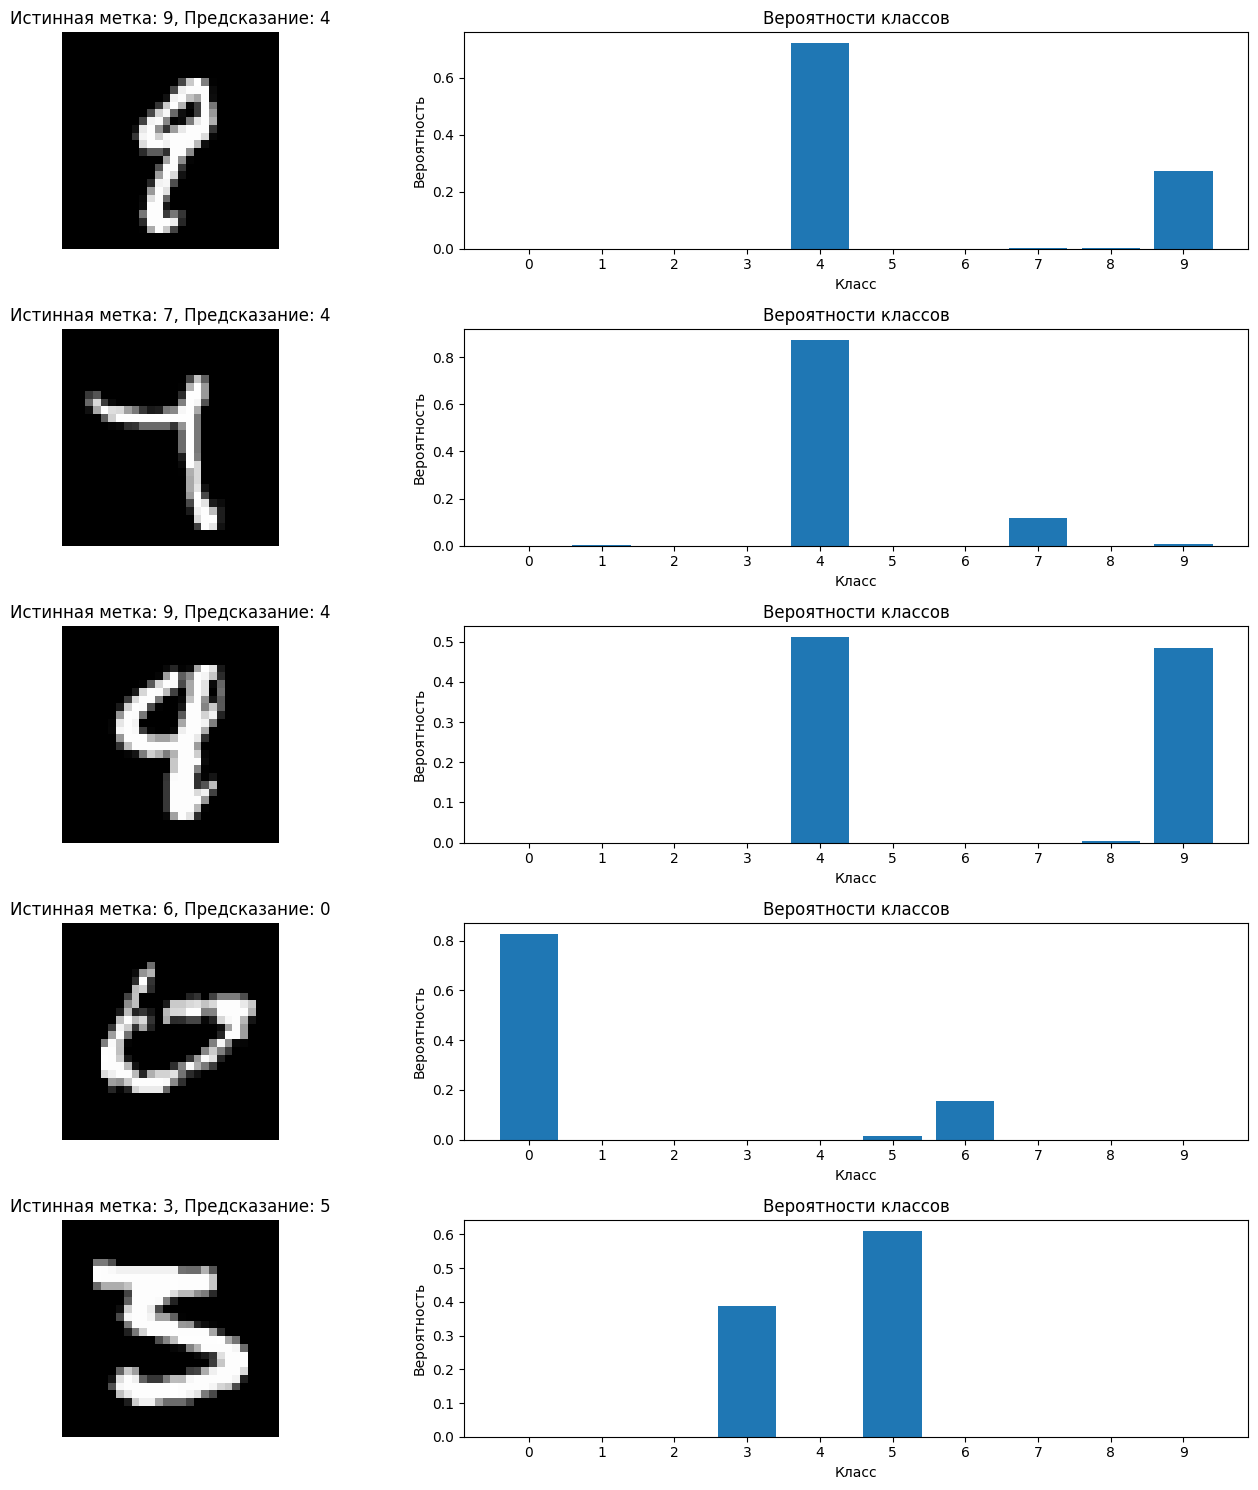

In [18]:
# Анализ неправильно классифицированных примеров для каждой модели
simple_rnn_model.name = "SimpleRNN"
lstm_model.name = "LSTM"
bidirectional_lstm_model.name = "Bidirectional LSTM"

analyze_misclassifications(simple_rnn_model, x_test, y_test)
analyze_misclassifications(lstm_model, x_test, y_test)
analyze_misclassifications(bidirectional_lstm_model, x_test, y_test)

### 6. Развертывание

Применения данных моделей на практике возможно для распознавания рукописного текста, речи, компьютерного зрения, динамического анализа изображений.

### 7. Выводы

В ходе эксперимента были обучены и протестированы архитектуры рекуррентных нейронных сетей на задаче классификации изображений из набора данных MNIST.

SimpleRNN:
- Быстрая в обучении и исполнении
- Ниже точность по сравнению с остальными моделями

LSTM:
- Высокая точность
- Долгое время обучения

Bidirectional LSTM:
- Максимально высокая точность среди трех моделей
- Наиболее затратная по вычислениям и времени чем LSTM
- Удвоенное количество параметров

CNN:
- Показывает наивысшую точность (0.9878)
- Долгое время обучения

CNN+RNN:
- Показывает более низкую точность , чем чистая CNN
- Долгое время обучения